# Example notebook for SSH Variability application

This notebook demonstrates how the SSH variability application works when the script is run. We first start by loading some of the modules, going up two levels so that we can import the `ssh` module

In [1]:
import sys
sys.path.insert(0, '../../')
from ssh_jal import sshVariability

In [2]:
pwd

'/work/ab0995/a270238/work/AQUA/diagnostics/ssh_jal/notebooks'

Please make sure that your config file is updated with the path to the output folder where the outputs of this notebook should be saved. In this code, if the output_directory key is not found in the config file, the output_directory variable will be set to a directory named 'output' in the current working directory (os.getcwd()).

The following cell executes the 'ssh_class.py' script with sshVariability class. The script performs the following: 

1. Reads and parses the configuration file (`config.yml`) to retrieve the necessary parameters and settings for the script's execution. Please make sure that the config file is updated with the information you would like to analyze.

2. Within the `sshVariability` class, defines methods to retrieve, process, and analyze the SSH data for each model starting with AVISO observational data.

3. Saved the std computation under outputs along with visualization based on the target grid defined in the config file. AQUA regridder capability is used to regrid the data and visualize the results in subplots.

2023-11-26 14:50:18 :: ssh_logger :: WARNING  -> Time ranges are not equal across models.
2023-11-26 14:50:20 :: ssh_logger :: INFO     -> Dask Dashboard URL: http://127.0.0.1:8787/status
2023-11-26 14:50:20 :: ssh_logger :: INFO     -> Workers=16, Memory=100.00 GiB
2023-11-26 14:50:20 :: Reader :: WARNING  -> No fixes available for model AVISO
2023-11-26 14:50:21 :: ssh_logger :: INFO     -> AVISO data spans from 1993-01-01T00:00:00.000000000 to 2022-06-23T00:00:00.000000000
2023-11-26 14:50:21 :: ssh_logger :: INFO     -> Now computing std on AVISO ssh for the provided timespan
2023-11-26 14:50:21 :: ssh_logger :: INFO     -> Now computing std on AVISO ssh for the provided timespan
2023-11-26 14:50:22 :: ssh_logger :: INFO     -> computation for AVISO ssh complete, saving output file
/home/a/a270238/conda/envs/aqua_common/lib/python3.11/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
2023-11-26 14:51:15 :: 

CPU times: user 3min 5s, sys: 17.6 s, total: 3min 23s
Wall time: 7min 47s


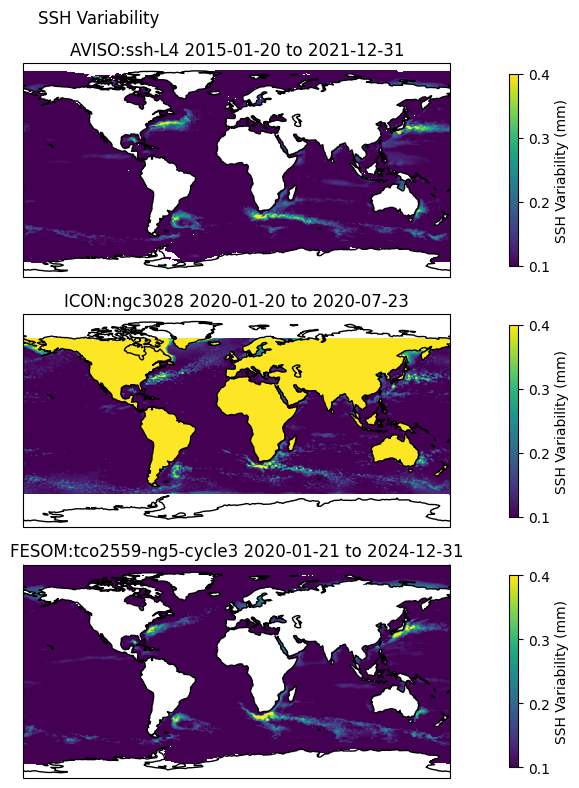

In [3]:
%%time
analyzer = sshVariability('../config1.yml')
analyzer.run()
# runtime is around 7-8 min depending on how much data you wish to analyse.

Double-Checking the output files. The cells below are just checking if the output files contain the right data.

The subfolders "NetCDF" and "PDF" are automatically created under your defined "Output" folder. This is where individual outputs will get saved. Note: NetCDF files that get saved are ungridded as they get saved before AQUA regridder is used.

In [4]:
import xarray as xr

In [5]:
# Specify the path to the NetCDF file output
file_path = '../out./netcdf/AVISO_ssh-L4_daily_std.nc'

# Open the NetCDF file using xarray
data = xr.open_dataset(file_path)
data

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    adt        (latitude, longitude) float64 ...

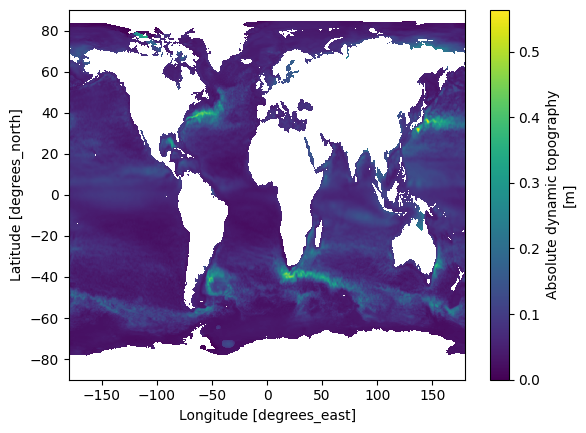

In [8]:
data.adt.plot()